You have a dataset called "heart_data.csv" containing various features related to heart disease. You are tasked with predicting whether a patient has heart disease (target variable: "heart_disease") using logistic regression, KNN, and decision trees. The dataset has already been preprocessed and split into training and testing sets.



In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



1. Load the dataset and split it into training and testing sets (80% training, 20% testing).


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=["output"])
y =data["output"]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (242, 13) (242,)
Testing set shape: (61, 13) (61,)



2. Apply logistic regression to the training set and evaluate its accuracy on the testing set. Report the accuracy score.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy1 = accuracy_score(y_test, y_pred)

# Report the accuracy score
print("Accuracy of logistic regression on the testing set:", accuracy1)

Accuracy of logistic regression on the testing set: 0.8852459016393442


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



3. Implement KNN with k=5 on the training set and compute its accuracy on the testing set. Report the accuracy score.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)

# Report the accuracy score
print("Accuracy of KNN (k=5) on the testing set:", accuracy2)


Accuracy of KNN (k=5) on the testing set: 0.6885245901639344



4. Build a decision tree classifier on the training set and evaluate its accuracy on the testing set. Report the accuracy score.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
tree_classifier.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = tree_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy3 = accuracy_score(y_test, y_pred)

# Report the accuracy score
print("Accuracy of the decision tree classifier on the testing set:", accuracy3)


Accuracy of the decision tree classifier on the testing set: 0.8524590163934426


5. Compare the accuracy scores of logistic regression, KNN, and decision trees. Which algorithm performed the best in this case?

In [ ]:
print("Accuracy of Logistic Regression:", accuracy1)
print("Accuracy of KNN (k=5):", accuracy2)
print("Accuracy of Decision Tree Classifier:", accuracy3)
#Logistic regression performed the best since the accuracy is highest

Accuracy of Logistic Regression: 0.8852459016393442
Accuracy of KNN (k=5): 0.6885245901639344
Accuracy of Decision Tree Classifier: 0.8524590163934426



# 6. Choose one of the algorithms that performed well and briefly discuss why it might be suitable for this specific problem.
Ans. Logistic regression remains a suitable choice for heart disease prediction due to its interpretability, clinical relevance, efficiency, and suitability for binary classification tasks. Its straightforward interpretation aligns well with clinicians' preferences, and its efficiency ensures timely predictions for prompt medical interventions. Additionally, logistic regression's ability to highlight feature importance facilitates targeted risk factor management.



# 7. What are some potential ways to improve the performance of the chosen algorithm?
Ans.! Here are some brief ways to improve the performance of logistic regression for heart disease prediction:

Feature Engineering: Enhance existing features or include new ones to
better capture complex relationships.

Regularization: Use techniques like L1 or L2 regularization to prevent overfitting and improve generalization.

Hyperparameter Tuning: Optimize parameters like regularization strength through techniques like grid search or random search.

Handling Imbalance: Address class imbalance through techniques like oversampling, undersampling, or using synthetic data generation methods.

Ensemble Methods: Explore combining logistic regression with other models using ensemble methods like bagging or boosting.

Cross-Validation: Employ rigorous cross-validation to assess model performance and ensure robustness.



8. Evaluate the importance of each feature in the decision tree classifier. Plot a bar chart showing the feature importances.


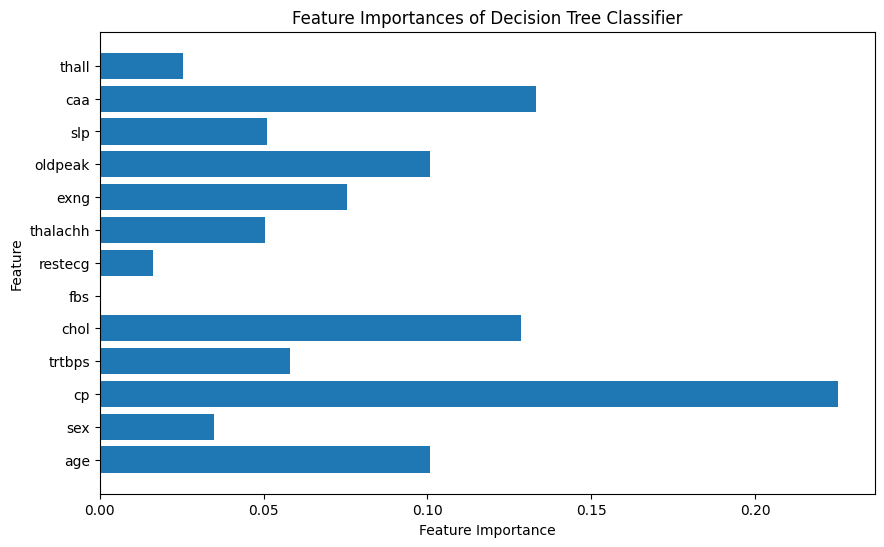

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the decision tree classifier
feature_importances = tree_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Classifier')
plt.show()



# 9. Explain one practical application for each of the three algorithms: logistic regression, KNN, and decision trees.
Logistic Regression: Credit Risk Assessment - Predicting the likelihood of loan default based on borrower characteristics.

K-Nearest Neighbors (KNN): Movie Recommendation - Suggesting movies to users based on the preferences of similar users.

Decision Trees: Disease Diagnosis - Assisting healthcare professionals in diagnosing diseases based on patient symptoms and medical data.

# 10. In what scenarios would you prefer to use logistic regression over KNN and decision trees, and vice versa?
Logistic regression is preferable when dealing with binary classification problems and when the relationship between the independent variables and the probability of a particular outcome can be assumed to be linear. It's also useful when interpretability of the model is important.
On the other hand, KNN is suitable when the decision boundary is highly irregular and there's no underlying assumption about the distribution of the data. It's also useful when you have a large amount of data and don't want to spend time training a model.
Decision trees are advantageous when interpretability and ease of explanation are important, and when dealing with non-linear relationships or interactions between variables. They are also robust to outliers and can handle both numerical and categorical data well.